In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'train.csv'
df = pd.read_csv(file_path)
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [24]:
# Check for missing values

print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
# Finding passenger distribution by class

print("\nPassenger distribution by class (pclass):")
print(df['Pclass'].value_counts())


Passenger distribution by class (pclass):
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [28]:
# Finding passenger distribution by gender

print("\nPassenger distribution by gender (sex):")
print(df['Sex'].value_counts())


Passenger distribution by gender (sex):
Sex
male      577
female    314
Name: count, dtype: int64


In [29]:
# Finding passenger survival rate

survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(f"\nOverall survival rate: {survival_rate[1]:.2f}%")


Overall survival rate: 38.38%


In [30]:
# Finding survival rate by class

survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival rate by class:")
print(survival_by_class)


Survival rate by class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [31]:
# Finding survival rate by gender

survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival rate by gender:")
print(survival_by_gender)


Survival rate by gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [34]:
# Finding survival rate by age

bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

print("\nSurvival rate by age group:")
print(survival_by_age)


Survival rate by age group:
AgeGroup
Child          57.971014
Teenager       42.857143
Adult          35.327103
Middle-aged    40.000000
Senior         22.727273
Name: Survived, dtype: float64


In [35]:
# Finding analyzing fare

print("\nFare analysis (grouped by class):")
print(df.groupby('Pclass')['Fare'].describe())


Fare analysis (grouped by class):
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


In [36]:
# Finding embarked location and survival rate

survival_by_embark = df.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival rate by embarkation point:")
print(survival_by_embark)


Survival rate by embarkation point:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [15]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Survival rate by passenger class')

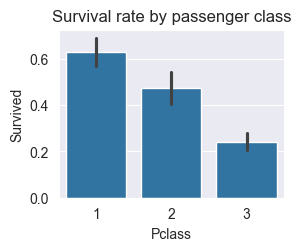

In [37]:
# class vs survival

plt.subplot(2, 2, 1)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival rate by passenger class')

Text(0.5, 1.0, 'Survival rate by gender')

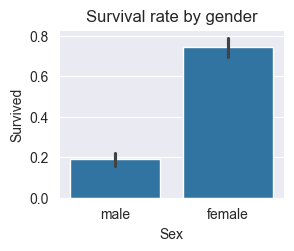

In [38]:
# gender vs survival

plt.subplot(2, 2, 2)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival rate by gender')

Text(0.5, 1.0, 'Survival rate by age group')

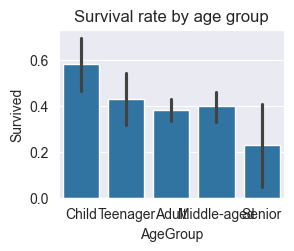

In [50]:
# Age group vs survival

plt.subplot(2, 2, 3)
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival rate by age group')

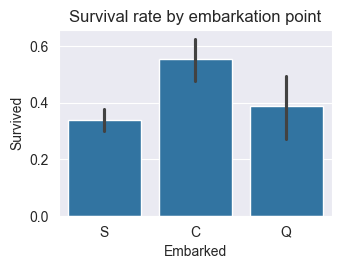

In [51]:
# Embarkation point vs survival

plt.subplot(2, 2, 4)
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival rate by embarkation point')

plt.tight_layout()
plt.show()